In [1]:
from scipy import optimize
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)

In [2]:
a = np.random.random(16) 

a /= np.sqrt(np.sum(np.abs(a) ** 2))

num_qubits = 4
dev = qml.device('default.qubit', wires=num_qubits)

In [3]:
@qml.qnode(dev)
def circuit(params):
    # 0-1
    qml.RY(params[0], wires=[0])
    qml.RY(params[1], wires=[1])
    qml.CNOT(wires=[0, 1])
    qml.RY(params[2], wires=[1])
    ####################################
    #2-3
    qml.RY(params[3], wires=[2])
    qml.RY(params[4], wires=[3])
    qml.CNOT(wires=[2, 3])
    qml.RY(params[5], wires=[3])
    ###################################
    #1-2
    qml.RY(params[6], wires=[1])
    qml.RY(params[7], wires=[2])
    qml.CNOT(wires=[1, 2])
    #qml.RY(params[8], wires=[2])
    
    ########################################
    #0-2
    qml.RY(params[8], wires=[0])
    qml.RY(params[9], wires=[2])
    qml.CNOT(wires=[0, 2])
    qml.RY(params[10], wires=[2])
    ########################################
    #1-3
    qml.RY(params[11], wires=[1])
    qml.RY(params[12], wires=[3])
    qml.CNOT(wires=[1, 3])
    #qml.RY(params[14], wires=[3])
    
    #0-3
    qml.RY(params[13], wires=[0])
    qml.RY(params[14], wires=[3])
    qml.CNOT(wires=[0, 3])
    qml.RY(params[15], wires=[3])
    
    

    return qml.state()


In [4]:
def loss(a,prediction):
    total_loss = np.real(np.sum(np.array((a-prediction)**2)))
    return total_loss

def cost(a,params):
    prediction = circuit(params)
    cost = loss(a,prediction)
    return cost


opt = qml.AdagradOptimizer(0.1)

params = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],requires_grad=True)


y = []
for i in range(300):
    params_and_a,prev_cost = opt.step_and_cost(cost,a,params)
    params = params_and_a[1]
    y.append(prev_cost)

In [5]:
x =  [i for i in range(300)]

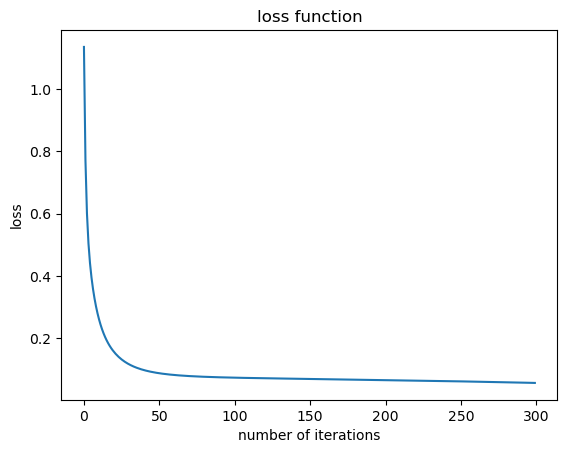

In [6]:
plt.plot(x, y)
#plt.legend(loc="Gradient")
plt.xlabel("number of iterations")
plt.ylabel("loss")
plt.title('loss function')
plt.show()